In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import Matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
import matplotlib.gridspec as gridspec
from sklearn.metrics import log_loss
from scipy.stats import probplot, shapiro

In [2]:
# Import the dataset
df_airline =  pd.read_csv("C:/Users/aishv/Documents/DataScience/Airline.csv", index_col=0)
pd.set_option('display.max_columns', None)
df_airline.head(5)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df_airline.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

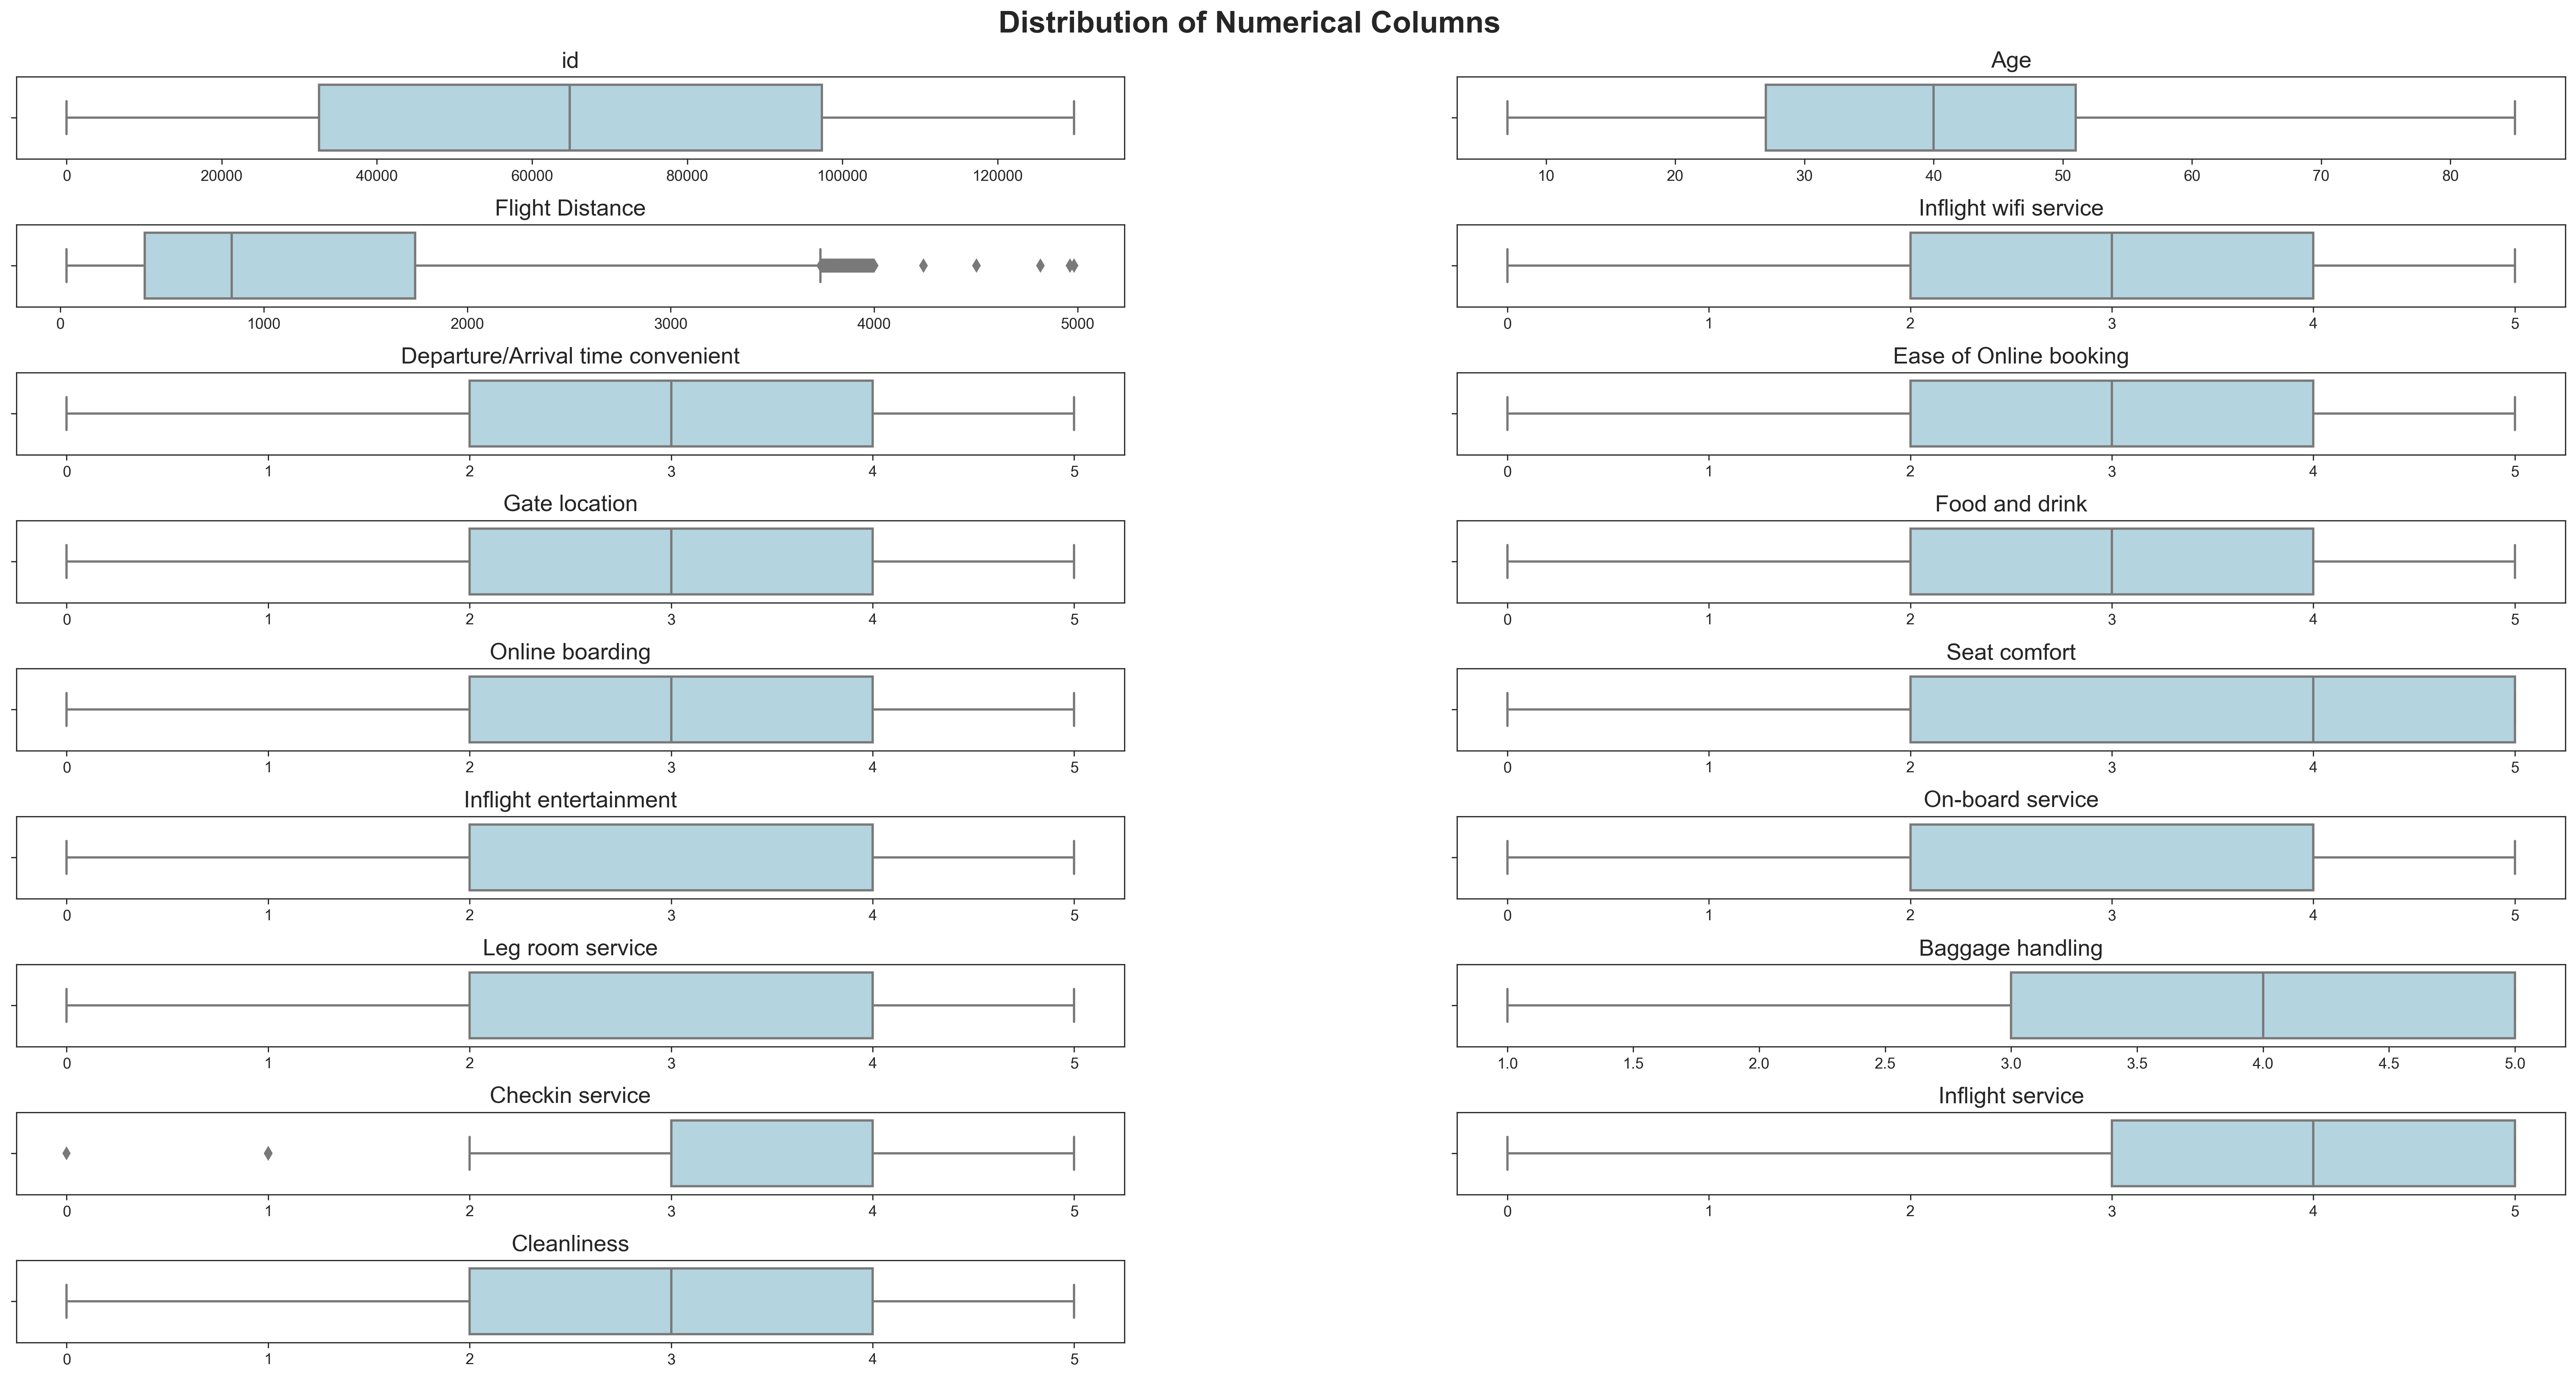

In [4]:
df_numerical_features = df_airline._get_numeric_data()

sns.set_style('ticks')
fig = plt.figure(figsize=(30,15),dpi=300)

for i,column_name in enumerate(df_numerical_features):
    if i < 17:
        plt.subplot(9,2,i+1)
        ax=sns.boxplot(x=column_name,data=df_numerical_features,color="lightblue")
        ax.set_title(column_name,size=15)
        plt.xlabel('')

plt.subplots_adjust(hspace = 0.8, wspace=0.3)
fig.suptitle("Distribution of Numerical Columns",size=20,fontweight='bold',y=0.92)
plt.show()

### Data Preprocessing

In [5]:
df_airline = df_airline.drop(['id'], axis=1)
df_airline.fillna(df_airline.mean(), inplace=True)

df_airline

C:\Users\aishv\AppData\Local\Temp\ipykernel_10200\3258613104.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_airline.fillna(df_airline.mean(), inplace=True)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
df_airline.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Descriptive Analysis

In [7]:
df_airline.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
df_airline.describe().transpose().style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,103904.000000,39.379706,15.114964,7.000000,27.000000,40.000000,51.000000,85.000000
Flight Distance,103904.000000,1189.448375,997.147281,31.000000,414.000000,843.000000,1743.000000,4983.000000
Inflight wifi service,103904.000000,2.729683,1.327829,0.000000,2.000000,3.000000,4.000000,5.000000
Departure/Arrival time convenient,103904.000000,3.060296,1.525075,0.000000,2.000000,3.000000,4.000000,5.000000
Ease of Online booking,103904.000000,2.756901,1.398929,0.000000,2.000000,3.000000,4.000000,5.000000
Gate location,103904.000000,2.976883,1.277621,0.000000,2.000000,3.000000,4.000000,5.000000
Food and drink,103904.000000,3.202129,1.329533,0.000000,2.000000,3.000000,4.000000,5.000000
Online boarding,103904.000000,3.250375,1.349509,0.000000,2.000000,3.000000,4.000000,5.000000
Seat comfort,103904.000000,3.439396,1.319088,0.000000,2.000000,4.000000,5.000000,5.000000
Inflight entertainment,103904.000000,3.358158,1.332991,0.000000,2.000000,4.000000,4.000000,5.000000


### Exploratory Data Analysis 

In [9]:
numerical_features=["Age","Departure Delay in Minutes" ,"Arrival Delay in Minutes","Flight Distance"]

# rest all are actually categorical
categorical_features=[x for x in df_airline.columns if x not in numerical_features]

# converting all ordinal features to categorical features
df_airline[categorical_features]=df_airline[categorical_features].astype("category")

#verifying the change
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

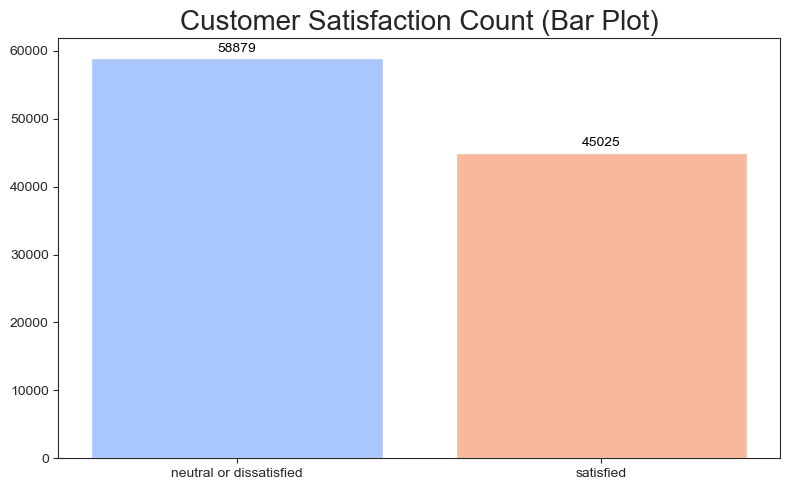

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get exactly 2 colors from the 'coolwarm' colormap
coolwarm_colors = sns.color_palette("coolwarm", n_colors=2)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
counts = df_airline["satisfaction"].value_counts()
bars = ax.bar(counts.index, counts.values, color=coolwarm_colors)

# Title and labels
ax.set_title("Customer Satisfaction Count (Bar Plot)", fontsize=20)

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval),
            ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


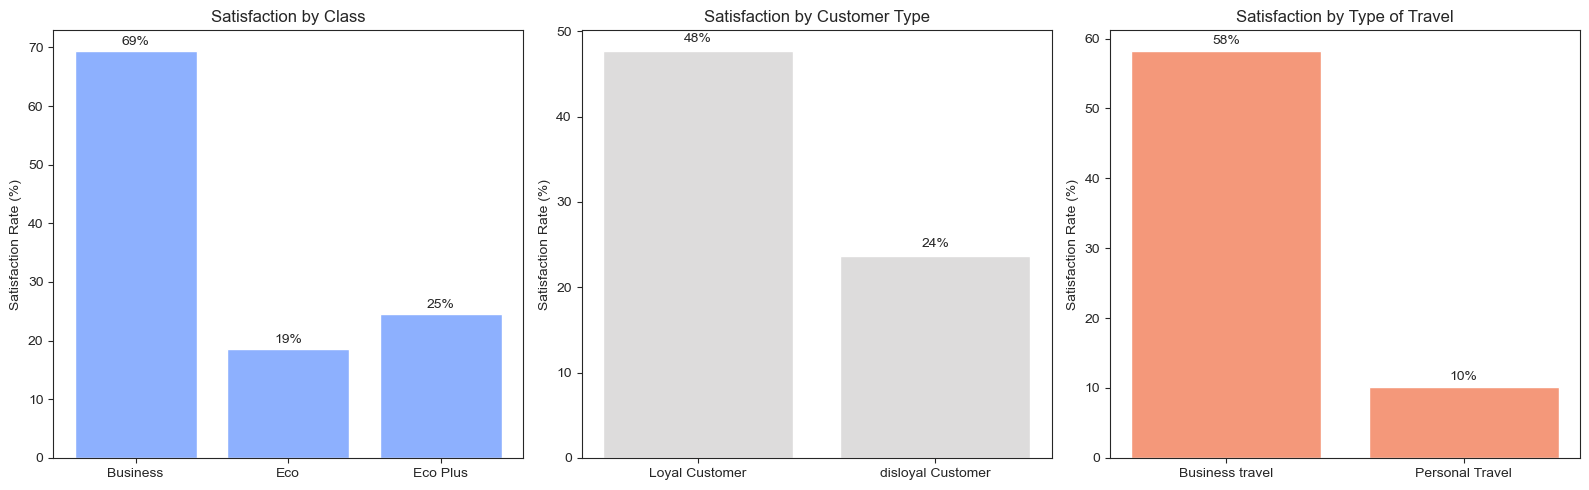

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert grouping columns to string
df_airline['Class'] = df_airline['Class'].astype(str)
df_airline['Customer Type'] = df_airline['Customer Type'].astype(str)
df_airline['Type of Travel'] = df_airline['Type of Travel'].astype(str)

# Create binary satisfaction column
df_airline['satisfaction_binary'] = (df_airline['satisfaction'] == 'satisfied').astype(int)

# Calculate satisfaction rates (%)
sat_by_class = df_airline.groupby('Class')['satisfaction_binary'].mean() * 100
sat_by_customer = df_airline.groupby('Customer Type')['satisfaction_binary'].mean() * 100
sat_by_travel = df_airline.groupby('Type of Travel')['satisfaction_binary'].mean() * 100

# Get coolwarm color palette for 3 plots
coolwarm_colors = sns.color_palette("coolwarm", n_colors=3)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot by Class
axes[0].bar(sat_by_class.index, sat_by_class.values, color=coolwarm_colors[0])
axes[0].set_title('Satisfaction by Class')
axes[0].set_ylabel('Satisfaction Rate (%)')
for x, y in enumerate(sat_by_class.values):
    axes[0].text(x, y + 1, f"{y:.0f}%", ha='center')

# Plot by Customer Type
axes[1].bar(sat_by_customer.index, sat_by_customer.values, color=coolwarm_colors[1])
axes[1].set_title('Satisfaction by Customer Type')
axes[1].set_ylabel('Satisfaction Rate (%)')
for x, y in enumerate(sat_by_customer.values):
    axes[1].text(x, y + 1, f"{y:.0f}%", ha='center')

# Plot by Type of Travel
axes[2].bar(sat_by_travel.index, sat_by_travel.values, color=coolwarm_colors[2])
axes[2].set_title('Satisfaction by Type of Travel')
axes[2].set_ylabel('Satisfaction Rate (%)')
for x, y in enumerate(sat_by_travel.values):
    axes[2].text(x, y + 1, f"{y:.0f}%", ha='center')

plt.tight_layout()
plt.show()


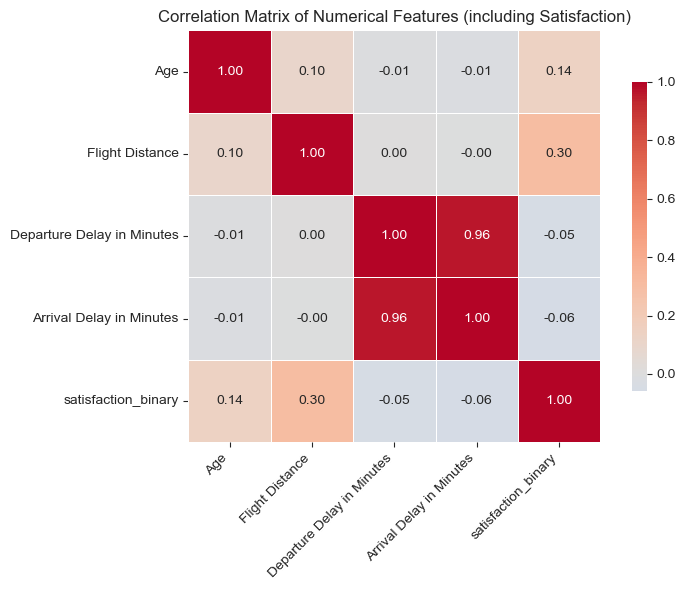

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


# Compute correlation matrix for all numerical features (including the binary satisfaction)
numeric_cols = df_airline.select_dtypes(include='number').columns
corr_matrix = df_airline[numeric_cols].corr()

# Plot correlation heatmap with values
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    annot=True,              
    fmt=".2f",               
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Numerical Features (including Satisfaction)')
plt.tight_layout()
plt.show()


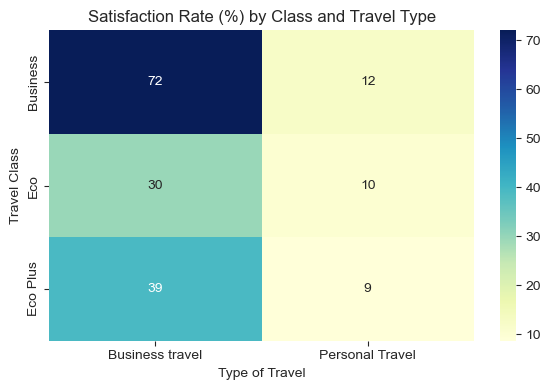

In [13]:
# Pivot table of satisfaction rate by Class and Type of Travel
pivot = df_airline.pivot_table(index='Class', columns='Type of Travel', values='satisfaction_binary', aggfunc='mean') * 100

# Plot heatmap of the pivot table
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Satisfaction Rate (%) by Class and Travel Type')
plt.ylabel('Travel Class')
plt.xlabel('Type of Travel')
plt.tight_layout()
plt.show()

In [14]:
df_airline.drop('satisfaction_binary', axis=1, inplace=True)

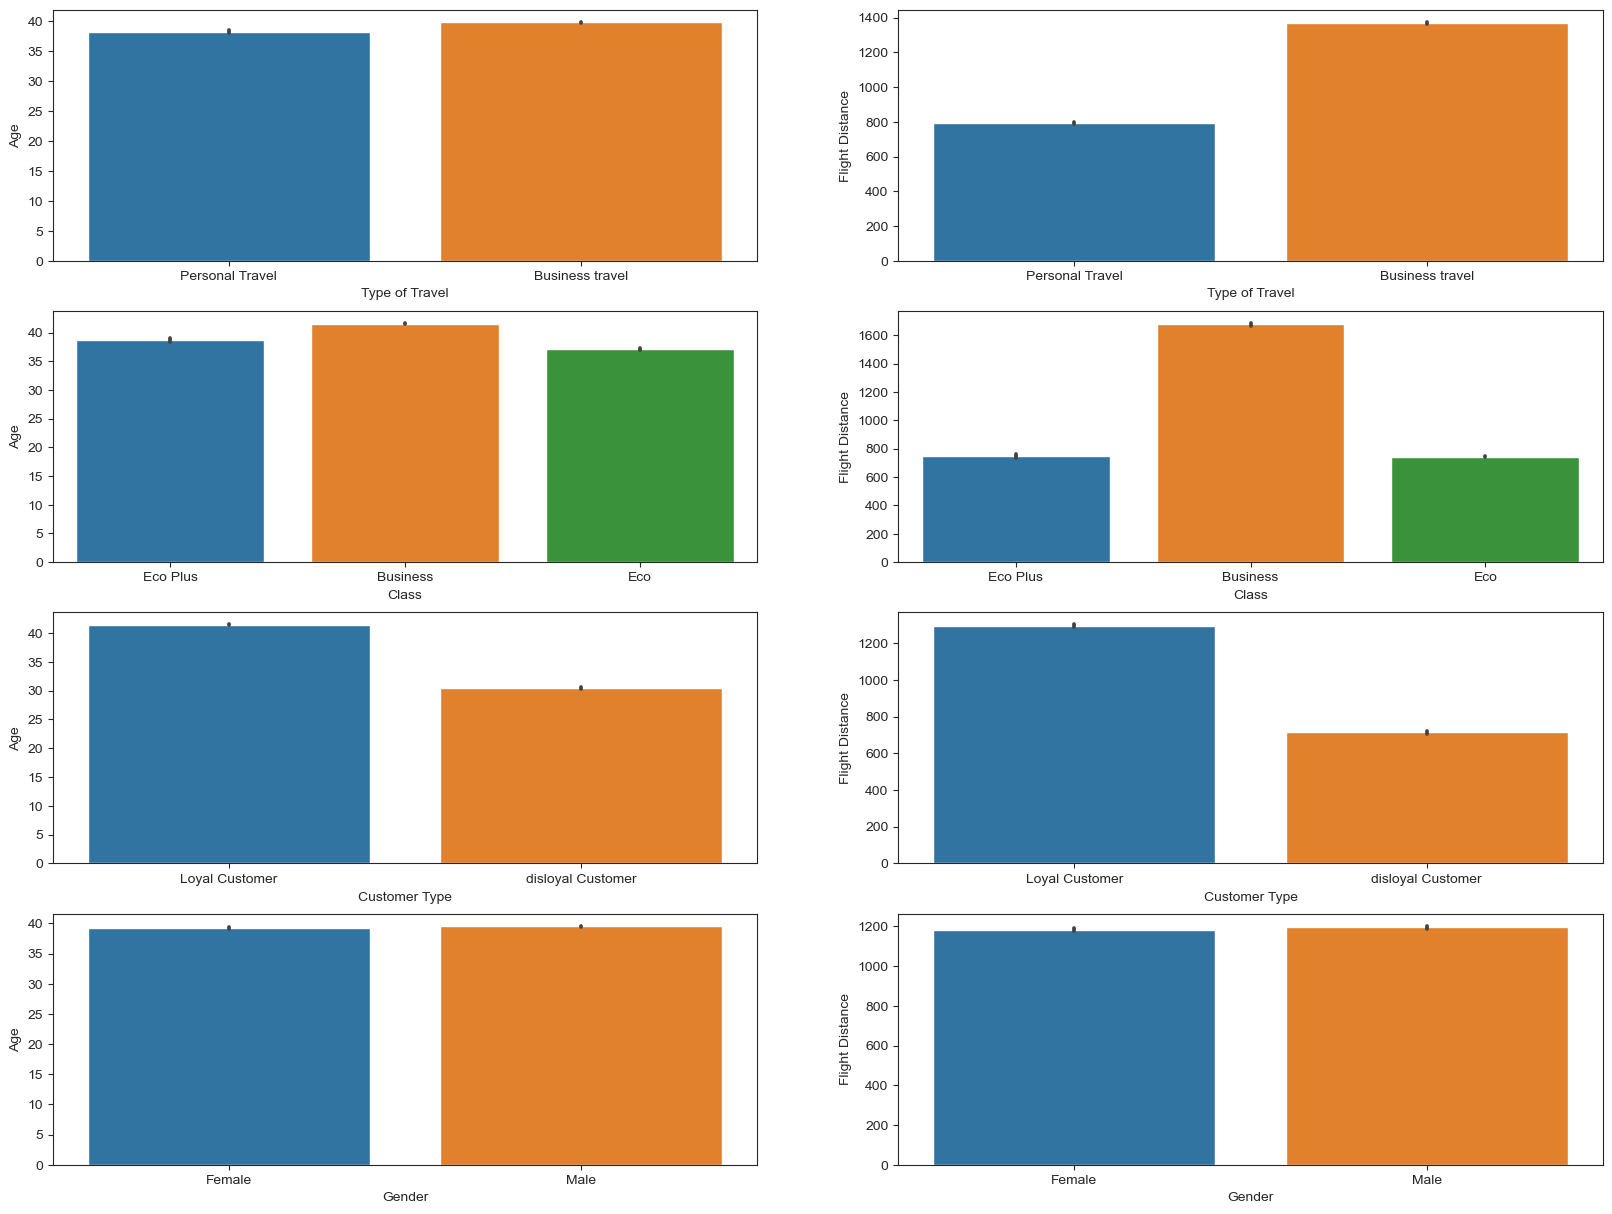

In [15]:
cat = ['Type of Travel','Class','Customer Type','Gender']
numerical = ['Age','Flight Distance']

plt.figure(figsize=(20, 15))

for i, cat_col in enumerate(cat):
    for j, num_col in enumerate(numerical):
        plt.subplot(len(cat), len(numerical), i * len(numerical) + j + 1)
        sns.barplot(x=cat_col, y=num_col, data=df_airline)
        plt.xlabel(cat_col)
        plt.ylabel(num_col)

plt.show()

Customers who travel for business purpose are more likely to take longer distance flight.

As flight distance increase customers are more likely to take business calss.

Loyal customers have more mean age compare to disloyal customer.

Loyal customers take long distance flight.

There are no relation of Age and Flight Disatnce with gender.

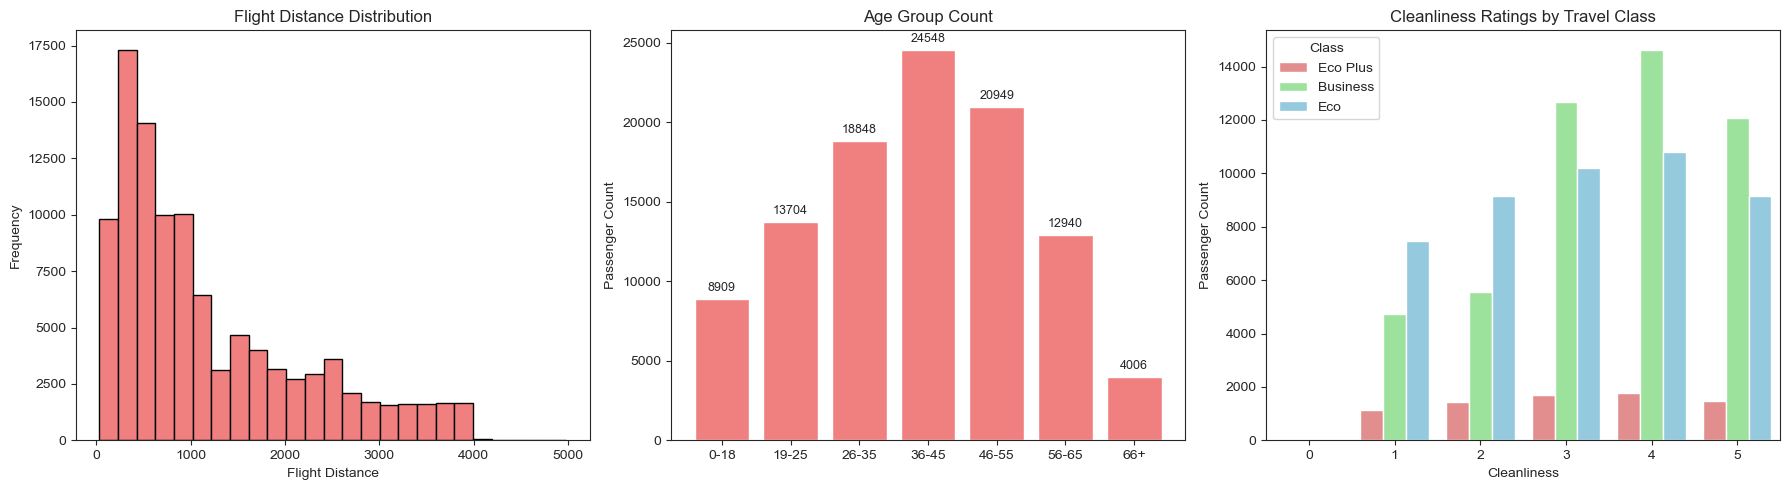

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create subplots for 3 overview plots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axs = axs.flatten()

# 1. Histogram of Flight Distance
axs[0].hist(df_airline["Flight Distance"], bins=25, color="lightcoral", edgecolor="black")
axs[0].set_title("Flight Distance Distribution")
axs[0].set_xlabel("Flight Distance")
axs[0].set_ylabel("Frequency")

# 2. Age Group Count (Bar Plot)
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66+"]
df_airline["Age Group"] = pd.cut(df_airline["Age"], bins=age_bins, labels=age_labels)
age_counts = df_airline["Age Group"].value_counts().sort_index()
axs[1].bar(age_counts.index, age_counts.values, color="lightcoral")
axs[1].set_title("Age Group Count")
axs[1].set_ylabel("Passenger Count")
for i, val in enumerate(age_counts.values):
    axs[1].text(i, val + 500, str(val), ha='center', fontsize=9)

# 3. Cleanliness by Class
sns.countplot(x="Cleanliness", hue="Class", data=df_airline,
              palette=["lightcoral", "lightgreen", "skyblue"], ax=axs[2])
axs[2].set_title("Cleanliness Ratings by Travel Class")
axs[2].set_ylabel("Passenger Count")

plt.tight_layout()
plt.show()


Flight Distance Distribution: Most flights are short to medium in range, with a long tail for long-haul routes.

Age Group Count: The majority of passengers are aged between 26 and 55, with the 36–45 group being the most represented.

Cleanliness Ratings by Travel Class: Business class passengers consistently give higher cleanliness ratings compared to Eco and Eco Plus.

C:\Users\aishv\AppData\Local\Temp\ipykernel_10200\493963883.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


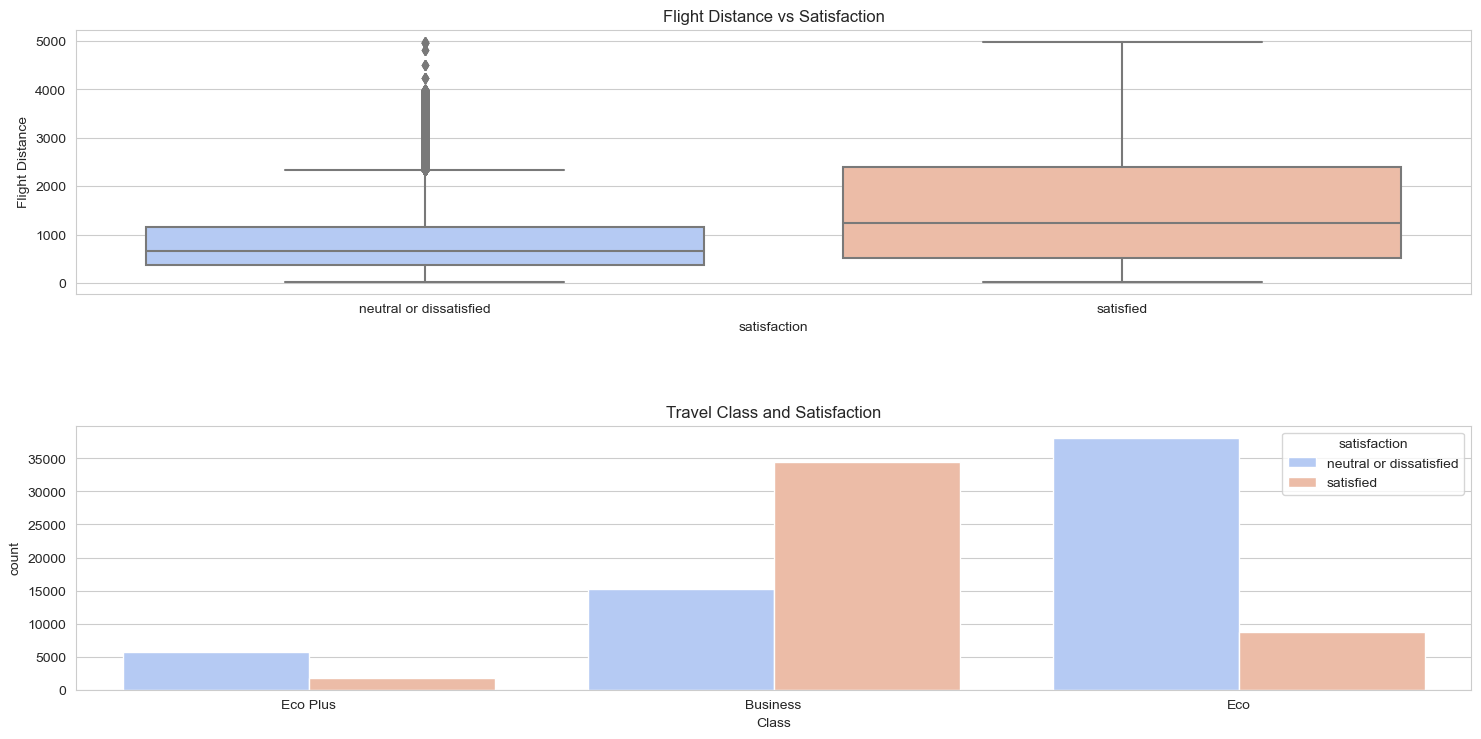

In [17]:
def plot_eda_part1(df_airline):
    sns.set_style('whitegrid')
    fig = plt.figure(figsize=(18, 24))
    grid = plt.GridSpec(5, 1, hspace=0.5)

    
    # 1. Flight Distance vs Satisfaction
    ax2 = fig.add_subplot(grid[1])
    sns.boxplot(x="satisfaction", y="Flight Distance", data=df_airline, palette="coolwarm", ax=ax2)
    ax2.set_title("Flight Distance vs Satisfaction")

    # 2. Class vs Satisfaction
    ax3 = fig.add_subplot(grid[2])
    sns.countplot(x="Class", hue="satisfaction", data=df_airline, palette="coolwarm", ax=ax3)
    ax3.set_title("Travel Class and Satisfaction")

    plt.tight_layout()
    plt.show()

plot_eda_part1(df_airline)


Flight Distance vs Satisfaction: Satisfied passengers tend to take longer flights.

Travel Class vs Satisfaction: Business class travelers are far more likely to be satisfied.

Type of Travel vs Satisfaction: Business travelers report higher satisfaction than personal travelers.

Age Distribution vs Satisfaction: Middle-aged passengers (35–55) show the highest satisfaction levels.

C:\Users\aishv\AppData\Local\Temp\ipykernel_10200\2462173441.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


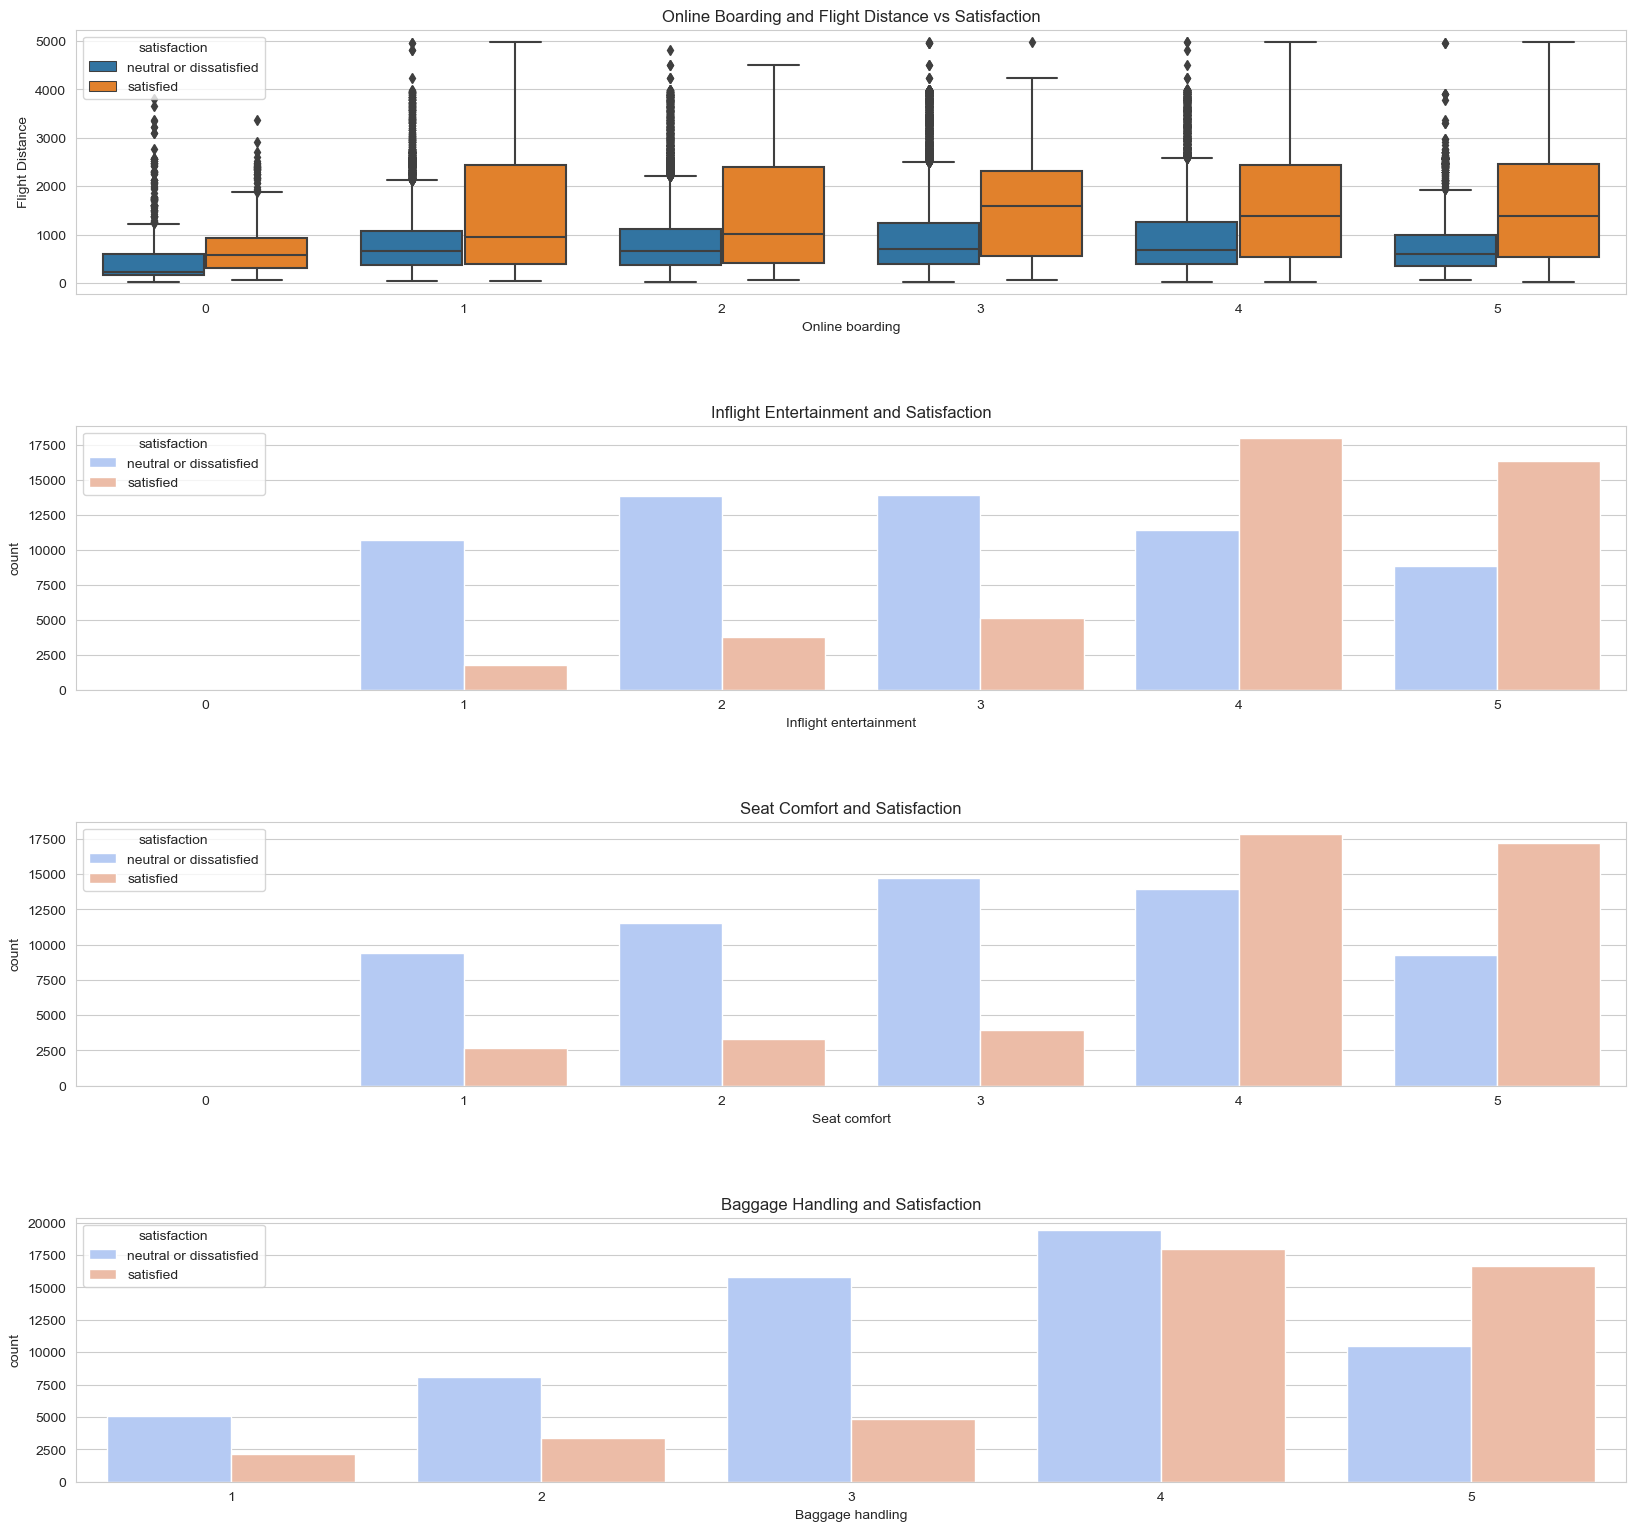

In [18]:
def plot_eda_part2(df_airline):
    fig = plt.figure(figsize=(20, 24))
    grid = plt.GridSpec(5, 1, hspace=0.5)

    # 5. Online Boarding vs Flight Distance
    ax6 = fig.add_subplot(grid[0])
    sns.boxplot(x="Online boarding", y="Flight Distance", hue="satisfaction", data=df_airline, ax=ax6)
    ax6.set_title("Online Boarding and Flight Distance vs Satisfaction")

    
    # 8. Inflight Entertainment vs Satisfaction
    ax8 = fig.add_subplot(grid[1])
    sns.countplot(x="Inflight entertainment", hue="satisfaction", data=df_airline, palette="coolwarm", ax=ax8)
    ax8.set_title("Inflight Entertainment and Satisfaction")

    # 9. Seat Comfort vs Satisfaction
    ax9 = fig.add_subplot(grid[2])
    sns.countplot(x="Seat comfort", hue="satisfaction", data=df_airline, palette="coolwarm", ax=ax9)
    ax9.set_title("Seat Comfort and Satisfaction")

    # 10. Baggage Handling vs Satisfaction
    ax10 = fig.add_subplot(grid[3])
    sns.countplot(x="Baggage handling", hue="satisfaction", data=df_airline, palette="coolwarm", ax=ax10)
    ax10.set_title("Baggage Handling and Satisfaction")

    plt.tight_layout()
    plt.show()

plot_eda_part2(df_airline)


Online Boarding vs Flight Distance by Satisfaction: Passengers who rated online boarding higher tend to take longer flights and report greater satisfaction.

Inflight Entertainment vs Satisfaction: Higher ratings for inflight entertainment strongly correlate with higher satisfaction.

Seat Comfort vs Satisfaction: Passengers reporting better seat comfort are significantly more likely to be satisfied.

Baggage Handling vs Satisfaction: Satisfaction increases steadily with higher baggage handling ratings.

### Feature Engineering

In [19]:
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df_airline, columns_to_encode):
    label_encoder = LabelEncoder()
    for col in columns_to_encode:
        df_airline[col] = label_encoder.fit_transform(df_airline[col])
    return df_airline

# Usage
columns_to_encode = ['Customer Type','Gender', 'Class','Type of Travel','satisfaction']
df_encoded = label_encode_columns(df_airline, columns_to_encode)
df_encoded

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Group
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0-18
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,19-25
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,26-35
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,19-25
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,56-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0,19-25
103900,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1,46-55
103901,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0,26-35
103902,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0,19-25


In [20]:
for col in ['Age Group']:
    le = LabelEncoder()
    df_airline[col] = le.fit_transform(df_airline[col])

In [21]:
# Convert all 'category' dtype columns in df_airline to integers
for col in df_airline.select_dtypes(include='category').columns:
    df_airline[col] = df_airline[col].astype(int)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Train-test split
X = df_airline.drop('satisfaction', axis=1)
y = df_airline['satisfaction']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Modeling

#### Checking for the base accuracy of the model

In [25]:
base_accuracy = df_airline['satisfaction'].value_counts(normalize=True).max()

print(f'Base Accuracy: {base_accuracy:.2%}')

Base Accuracy: 56.67%


Inference:

    -> The baseline model always predicts the most frequent class (in this case, "neutral or dissatisfied") without using any features.
    
    -> It achieves 56.67% accuracy by simply guessing the majority class every time, acting as a benchmark for evaluating real models.

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Fit Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Fit Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fit Logistic Regression
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train_scaled, y_train)

#Fit XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation function
def evaluate_model(model, model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'Classification Report ({model_name}):')
    print(classification_report(y_true, y_pred))
    print(f'Confusion Matrix ({model_name}):')
    print(confusion_matrix(y_true, y_pred))
    print('\n')

# Evaluate all models
evaluate_model(dt_model, 'Decision Tree', y_test, y_pred_dt)
evaluate_model(rf_model, 'Random Forest', y_test, y_pred_rf)
evaluate_model(lr_model, 'Logistic Regression', y_test, y_pred_lr)
evaluate_model(xgb_model, 'XGBoost', y_test, y_pred_xgb)


Decision Tree Accuracy: 0.95
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

Confusion Matrix (Decision Tree):
[[11143   570]
 [  540  8528]]


Random Forest Accuracy: 0.96
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

Confusion Matrix (Random Forest):
[[11475   238]
 [  532  8536]]


Logistic Regression Accuracy: 0.54
Classification Report (Logistic Regressio

### Performance Enhancement

#### Recursive Selection  Using RandomForest Estimator

In [27]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

# Define the XGBoost model (clean, no warning)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Apply RFE
rfe = RFE(estimator=xgb_model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Online boarding'],
      dtype='object')


#### Testing the model with the Selected Feature from above Feature elimination stage

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the selected features (you can update this list based on your actual RFE output)
selected_features = [
    'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service','Online boarding']

# Split into features and target
X = df_airline[selected_features]
y = df_airline['satisfaction']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize (optional for XGBoost, but do it if you want parity with Logistic Regression / RF testing)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11713
           1       0.91      0.88      0.89      9068

    accuracy                           0.91     20781
   macro avg       0.91      0.90      0.91     20781
weighted avg       0.91      0.91      0.91     20781

[[10879   834]
 [ 1093  7975]]


#### Validation Curve

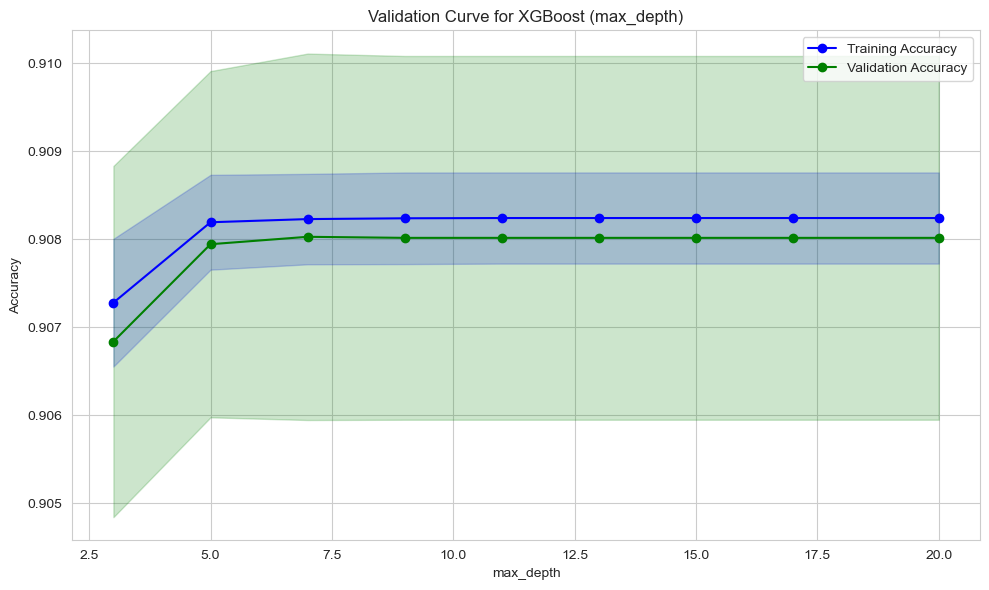

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier

# Define model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Range of values to test for max_depth
param_range = [3, 5, 7, 9, 11, 13, 15, 17, 20]

# Compute validation curve
train_scores, test_scores = validation_curve(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(param_range, test_mean, label="Validation Accuracy", color="green", marker="o")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

plt.title("Validation Curve for XGBoost (max_depth)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

#### ROC Curve

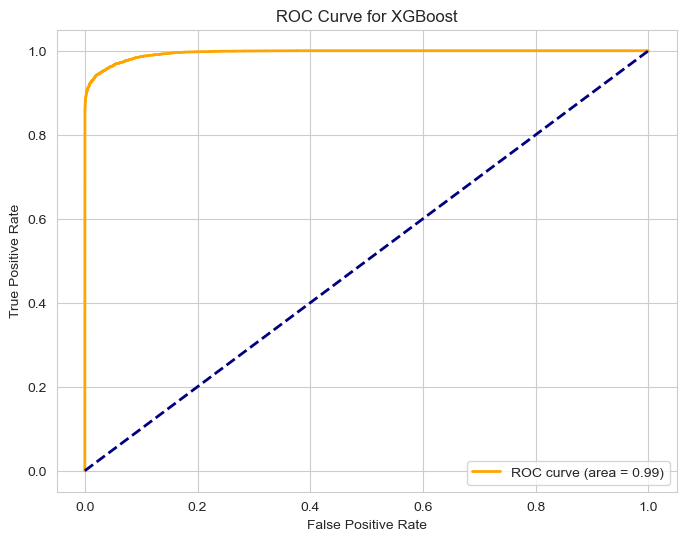

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Fit the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict probabilities
y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Hyperparameter Tuning

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature and target selection
X = df_airline[['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
                'Online boarding', "Inflight entertainment", "Seat comfort", "On-board service",
                "Leg room service", "Cleanliness", "Baggage handling", "Inflight service",
                "Checkin service", "Food and drink"]]
y = df_airline['satisfaction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Hyperparameter Grid
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Grid Search
xgb_grid_search = GridSearchCV(estimator=xgb_model,
                                param_grid=xgb_params,
                                cv=5,
                                verbose=2,
                                n_jobs=-1)

xgb_grid_search.fit(X_train_scaled, y_train)
xgb_best_model = xgb_grid_search.best_estimator_

# Evaluation Function
def evaluate_best_model(model, model_name, X_test_data, y_true):
    y_pred = model.predict(X_test_data)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'{model_name} Accuracy (Best Model): {accuracy:.2f}')
    print(f'Classification Report ({model_name}):')
    print(classification_report(y_true, y_pred))
    print(f'Confusion Matrix ({model_name}):')
    print(confusion_matrix(y_true, y_pred))
    print('\n')

# Evaluate Best XGBoost Model
evaluate_best_model(xgb_best_model, 'XGBoost', X_test_scaled, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
XGBoost Accuracy (Best Model): 0.95
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11713
           1       0.96      0.93      0.95      9068

    accuracy                           0.95     20781
   macro avg       0.96      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

Confusion Matrix (XGBoost):
[[11404   309]
 [  645  8423]]


